In [2]:
import cv2
import pytesseract
from matplotlib import pyplot as plt

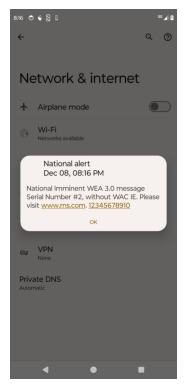

In [3]:
filename = 'resources/screenshot_08-12-2024_20-15-51.png'

img = cv2.imread(filename)

#remove axes
plt.axis('off')

plt.imshow(img)

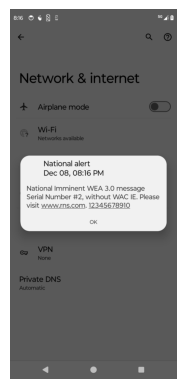

In [5]:
grey_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.axis('off')
plt.imshow(grey_img, cmap='gray')

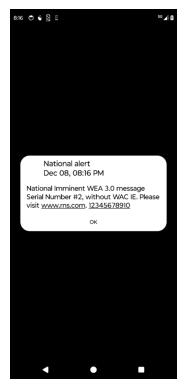

In [6]:
_, thres_img = cv2.threshold(grey_img, None, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.axis('off')
plt.imshow(thres_img, cmap='gray')

In [8]:
data = pytesseract.image_to_data(thres_img, output_type=pytesseract.Output.DICT)
filtered_data = []
for i in range(len(data["text"])):
    conf = int(data["conf"][i])
    if conf > 90:
        x = data["left"][i]
        y = data["top"][i]
        w = data["width"][i]
        h = data["height"][i]
        
        text = data["text"][i]
        filtered_data.append((x, y, w, h, text, conf))

print(filtered_data)

[(221, 982, 180, 38, 'National', 96), (419, 983, 99, 37, 'alert', 96), (221, 1046, 83, 35, 'Dec', 95), (321, 1046, 69, 42, '08,', 95), (407, 1046, 116, 35, '08:16', 96), (541, 1046, 63, 35, 'PM', 96), (110, 1145, 162, 34, 'National', 95), (289, 1145, 196, 34, 'Imminent', 95), (499, 1147, 101, 32, 'WEA', 95), (614, 1147, 60, 32, '3.0', 96), (690, 1155, 181, 33, 'message', 96), (109, 1200, 105, 34, 'Serial', 96), (231, 1201, 164, 33, 'Number', 96), (409, 1202, 65, 39, '#2,', 96), (489, 1200, 162, 34, 'without', 96), (665, 1202, 100, 32, 'WAC', 95), (782, 1202, 42, 32, 'IE.', 96), (841, 1201, 125, 33, 'Please', 96), (107, 1255, 82, 34, 'visit', 92), (511, 1257, 264, 32, '12345678910', 96), (516, 1369, 48, 25, 'OK', 96), (62, 946, 956, 500, '', 95)]


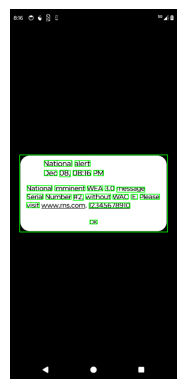

In [18]:
# add colour channels to thres_img
thres_img = cv2.cvtColor(thres_img, cv2.COLOR_GRAY2RGB)

for i in filtered_data:
    cv2.rectangle(thres_img, (i[0], i[1]), (i[0] + i[2], i[1] + i[3]), (0, 255, 0), 3)
    
plt.axis('off')
plt.imshow(thres_img, cmap='gray')
plt.show()

In [17]:
#save image
cv2.imwrite('resources/processed_image.png', thres_img)

True

In [19]:
print(pytesseract.image_to_string(thres_img))

816 © © Rl A 564i 8

National alert
Ded 08) 08:!I6 PM

National imminent WEA) B.0 message

Serial Number #2) without WAO [E) Please
visit Www.rns.com. 12345678910


